# EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('valeursfoncieres-2019.txt',sep='|')


C:\Users\Pirlouit\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (18,23,24,26,28,31,33,41) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df = data.copy()
df.shape

(3142952, 43)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142952 entries, 0 to 3142951
Data columns (total 43 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Code service CH             float64
 1   Reference document          float64
 2   1 Articles CGI              float64
 3   2 Articles CGI              float64
 4   3 Articles CGI              float64
 5   4 Articles CGI              float64
 6   5 Articles CGI              float64
 7   No disposition              int64  
 8   Date mutation               object 
 9   Nature mutation             object 
 10  Valeur fonciere             object 
 11  No voie                     float64
 12  B/T/Q                       object 
 13  Type de voie                object 
 14  Code voie                   object 
 15  Voie                        object 
 16  Code postal                 float64
 17  Commune                     object 
 18  Code departement            object 
 19  Code commune         

# NOTES

Objectif :

    Comprendre du mieux possible nos données 
    Développer une premiere stratégie de modélisation

Checklist de base
Analyse de Forme :

    variable target : Valeur foncière
    Lignes et colonnes : (3142952, 43) mais on va travailler ici seulement sur les valeurs de Lille -> (14750, 43) et peut-être on étendra au 59 
    Types de variables : qualitatives : 22, quantitatives : 21
    Analyse des valeurs manquantes :
        beaucoup de NaN (un peu moins de la moitié des variables > 85% de NaN)

Analyse de Fond :

    Visualisation de la target :
        Quelques outliers et erreurs de saisies dans le dataset, on les filtre
        Au final on se retrouve avec une médiane autour des 180k  et la majorité des biens en dessous de 500k

    Signification des variables :
        On garde comme type local seulement maison et appartement
        On supprime beaucoup de colonnes qui contiennent beaucoup de valeurs manquantes
        On effectue beaucoup de nettoyage sur les variables (voir dans la fonction preprocessing)
    Relation Variables / Target :
        Les prix sont à peu près les mêmes pour les maisons et les appartements, mais il y a plus d'appart que de maisons (à peu près le double)
        Prix vvarie avec code postal (difference de 30k entre medianes de 59000 et 59800 )
        Tendance linéaire quand la surface augmente, mais quand la surface est faible, on a de tous les prix
Analyse plus détaillée

    Relation Variables / Variables :
        
    Le modèle va peut-être avoir du mal a prédire précisement le prix si on met maison&appartement, peut-être garder que appartement?

In [4]:
#IDENTIFICATION TYPES DE VARIABLES
print(df.dtypes) #affiche les types des variables
print(df.dtypes.value_counts()) #compte les differents types de variable

Code service CH               float64
Reference document            float64
1 Articles CGI                float64
2 Articles CGI                float64
3 Articles CGI                float64
4 Articles CGI                float64
5 Articles CGI                float64
No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere                object
No voie                       float64
B/T/Q                          object
Type de voie                   object
Code voie                      object
Voie                           object
Code postal                   float64
Commune                        object
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
No Volume                      object
1er lot                        object
Surface Carrez du 1er lot      object
2eme lot    

In [5]:
pd.set_option('display.max_column',111) #permet d'afficher toutes les columns du dataset 

df.head()

,Code service CH,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Prefixe de section,Section,No plan,No Volume,1er lot,Surface Carrez du 1er lot,2eme lot,Surface Carrez du 2eme lot,3eme lot,Surface Carrez du 3eme lot,4eme lot,Surface Carrez du 4eme lot,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"37220,00",26.0,NaN,RUE,2730,DE MONTHOLON,1000.0,BOURG-EN-BRESSE,1,53,NaN,AI,298,NaN,8,"19,27",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2.0,Appartement,NaN,20.0,1.0,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"185100,00",22.0,NaN,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,95,NaN,137,NaN,154,"61,51",NaN,NaN,NaN,NaN,NaN,NaN,2,2.0,Appartement,NaN,62.0,3.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,04/01/2019,Vente,"185100,00",22.0,B,RUE,1650,GEN DELESTRAINT,1000.0,BOURG-EN-BRESSE,1,53,NaN,AM,95,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3.0,Dépendance,NaN,0.0,0.0,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,08/01/2019,Vente,"209000,00",3.0,NaN,RUE,0043,DES CHAMPAGNES,1160.0,PRIAY,1,314,NaN,E,1676,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,90.0,4.0,S,NaN,940.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,07/01/2019,Vente,"134900,00",5.0,NaN,LOT,A003,LE BIOLAY,1370.0,SAINT-ETIENNE-DU-BOIS,1,350,NaN,AA,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,Maison,NaN,101.0,5.0,S,NaN,490.0


Nombre de lots                0.000000
No plan                       0.000000
Code commune                  0.000000
Code departement              0.000000
Commune                       0.000000
No disposition                0.000000
Date mutation                 0.000000
Nature mutation               0.000000
Section                       0.000441
Code postal                   0.007573
Code voie                     0.007573
Voie                          0.007594
Valeur fonciere               0.009475
Type de voie                  0.148180
Nature culture                0.264585
Surface terrain               0.264585
No voie                       0.277379
Type local                    0.341064
Code type local               0.341064
Nombre pieces principales     0.342083
Surface reelle bati           0.342083
1er lot                       0.743797
B/T/Q                         0.942428
Surface Carrez du 1er lot     0.944970
Nature culture speciale       0.957869
2eme lot                 

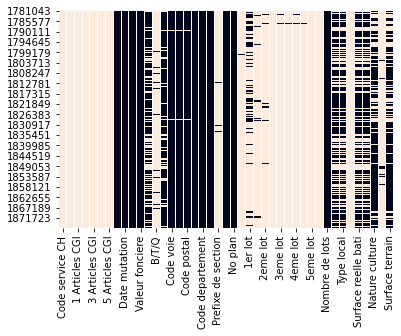

In [7]:
#IDENTIFICATION DES VALEURS MANQUANTES
df = df[df['Code departement']==59]  #on ne selectionne qu'une partie des donnees car trop volumineux
#df = df[df['Commune']=='LILLE'] #on ne garde que les valeurs pour Lille ici
#plt.figure(figsize=(20,10))
sns.heatmap(df.isna(),cbar=False)  #permet de visualiser l'ensemble du dataset avec les données manquantes(en blanc)
#plt.imshow(df.isna())
print((df.isna().sum()/df.shape[0]).sort_values())  #trie les colonnes selon le pourcentage de donnees manquantes(croissant)


In [8]:
df.shape

(95202, 43)

<AxesSubplot:>

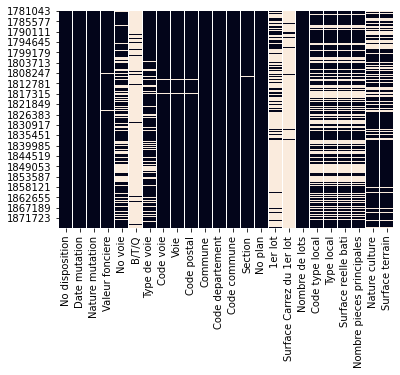

In [9]:
df = df[df.columns[(df.isna().sum()/df.shape[0] < 0.95)]] #on applique le changement au dataset
sns.heatmap(df.isna(),cbar=False)  #permet de visualiser l'ensemble du dataset avec les données manquantes(en blanc)
#On ne garde donc que les features qui ont moins de 95% de données manquantes

In [10]:
df['Nature mutation'].value_counts()

Vente                                 86034
Vente en l'état futur d'achèvement     7983
Echange                                 492
Adjudication                            388
Vente terrain à bâtir                   289
Expropriation                            16
Name: Nature mutation, dtype: int64

In [11]:
df['Nature mutation'] = df['Nature mutation'][((df['Nature mutation']=="Vente") | (df['Nature mutation']=="Vente en l'état futur d'achèvement"))]

In [12]:
df = df[df['Nature mutation'].isna()==False] #on ne garde que les mutations de type vente ou vente en l'état futur d'achevement
df = df[df['Surface reelle bati'].isna()==False] 
df = df[df['Surface reelle bati']!=0] #on supprime les colonnes ou la surface bati est 0
df = df[df['Nombre pieces principales'].isna()==False] 
df = df[df['Type local'].isna()==False] 
df = df[df['Type de voie'].isna()==False] 
df = df[df['Valeur fonciere'].isna()==False] 




<AxesSubplot:>

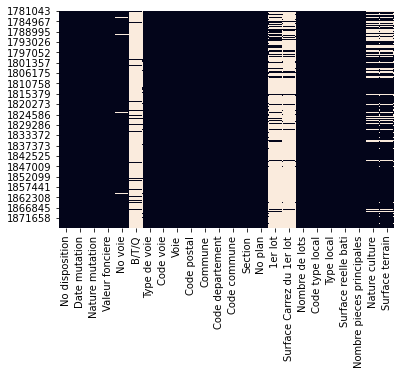

In [13]:
sns.heatmap(df.isna(),cbar=False)

In [14]:
df['Nature culture'].value_counts() #se renseigner, c'est quoi le nature culture ? cela correspond au cadre (passage a niveau, foret, ...)

S     35024
AG     1103
J      1061
PA      290
AB      180
T       154
PP       13
VE       12
E         9
L         5
CH        5
BS        4
BP        3
P         3
CA        1
BT        1
Name: Nature culture, dtype: int64

C:\Users\Pirlouit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pirlouit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Pirlouit\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

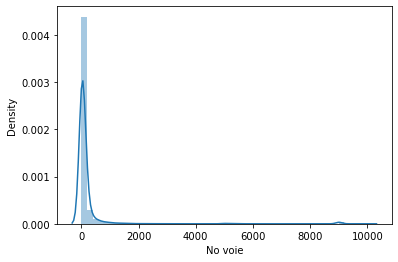

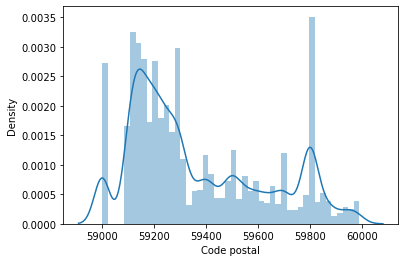

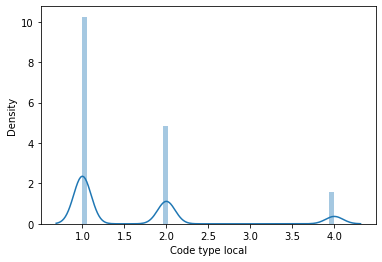

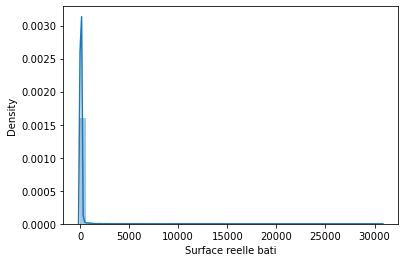

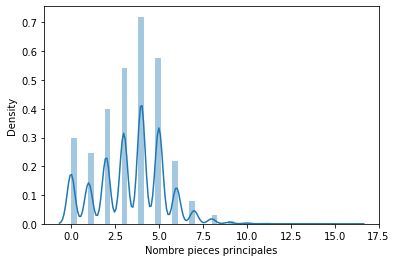

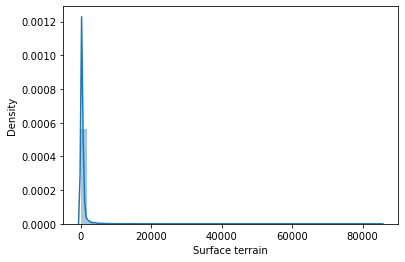

In [15]:
#Histogramme des variables continues
for col in df.select_dtypes('float'):  #select_dtypes permet de selectionner le type de variable qu'on veut
    plt.figure()
    sns.distplot(df[col])

In [16]:
#IDENTIFICATION TYPES DE VARIABLES DANS LA COLONNE TARGET
#La colonne contient donc des types object
#df['Valeur fonciere'].replace(',','.')
#df['Valeur fonciere']=pd.to_numeric(df['Valeur fonciere'], errors='coerce')
df['Valeur fonciere'] #le type de valeur est un str

1781043    190500,00
1781046    116000,00
1781048    217450,00
1781050    113000,00
1781051    109000,00
             ...    
1876187    158000,00
1876189    133500,00
1876217    100000,00
1876218    100000,00
1876237     57000,00
Name: Valeur fonciere, Length: 49004, dtype: object

<AxesSubplot:xlabel='Nature mutation', ylabel='count'>

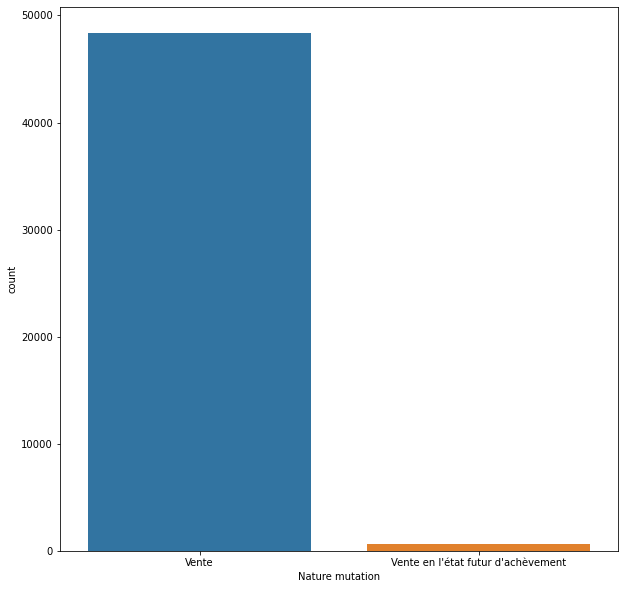

In [17]:

plt.figure(figsize=(10,10))
sns.countplot(x='Nature mutation', data=df)


Au vu du faible nombre de Vente en l'état futur d'achèvement, on va garder uniquement le type Vente dans le 'Nature Mutation'

In [18]:
df.isnull().sum() #on constate bcp de valeurs nulles pour la surface Carrez on va supprimer la colonne

No disposition                   0
Date mutation                    0
Nature mutation                  0
Valeur fonciere                  0
No voie                        337
B/T/Q                        45951
Type de voie                     0
Code voie                        0
Voie                             0
Code postal                      0
Commune                          0
Code departement                 0
Code commune                     0
Section                         21
No plan                          0
1er lot                      38088
Surface Carrez du 1er lot    44274
Nombre de lots                   0
Code type local                  0
Type local                       0
Surface reelle bati              0
Nombre pieces principales        0
Nature culture               11136
Surface terrain              11136
dtype: int64

In [19]:
df = df[df['Nombre de lots']<2]           #on garde uniquement pour un nombre de lots égal à 1 ou 0 pour simplifier la prediction
df['Nombre de lots'].value_counts()


0    38088
1     7335
Name: Nombre de lots, dtype: int64

In [20]:
#On convertit le type de la target de str en float ici
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',','.')
df['Valeur fonciere']=pd.to_numeric(df['Valeur fonciere'], errors='coerce')
df['Valeur fonciere']

1781046    116000.0
1781048    217450.0
1781051    109000.0
1781052    309700.0
1781053    307000.0
             ...   
1876179    105000.0
1876189    133500.0
1876217    100000.0
1876218    100000.0
1876237     57000.0
Name: Valeur fonciere, Length: 45423, dtype: float64

In [48]:
def preprocessing(df): #on regroupe toutes les modifications qu'on fait sur le dataset dans une fonction preprocessing 
    df = df[df['Commune']=='LILLE'] #on ne garde que les valeurs pour Lille ici
   # df = df[df['Code departement']==59]  #on ne selectionne qu'une partie des donnees car trop volumineux
    df = df[df.columns[(df.isna().sum()/df.shape[0] < 0.80)]] #on supprime les colonnes qui ont plus de 80% de manquants
    df = df[df['Nature mutation']=='Vente']
    df = df[df['Nature mutation'].isna()==False] #on ne garde que les mutations de type vente ou vente en l'état futur d'achevement
    df = df[df['Surface reelle bati'].isna()==False] 
    df = df[df['Surface reelle bati']!=0] #on supprime les colonnes ou la surface bati est 0
    df = df[df['Surface terrain']!=0] #on supprime les colonnes ou la surface bati est 0
    df = df[df['Nombre pieces principales'].isna()==False] 
    df = df[df['Type local'].isna()==False] 
    df = df[df['Type de voie'].isna()==False] 
    df = df[df['Valeur fonciere'].isna()==False] 
    df = df[df['Nombre de lots']<2] 
   # df = df.drop('1er lot',axis=1)

    df = df[df['Type local']!='Local industriel. commercial ou assimilé']
    return df
    
df = preprocessing(df)

# On va visualiser la target (Valeur fonciere)

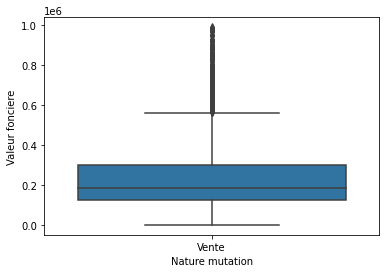

In [49]:
sns.boxplot(x="Nature mutation", y="Valeur fonciere", data=df)
df = df[df['Valeur fonciere']<8000000] #on supprime les biens dont la valeur est supérieure à 8 millions (outliers)


Presence d'outliers on va chercher à les identifier

<AxesSubplot:xlabel='Nature mutation', ylabel='Valeur fonciere'>

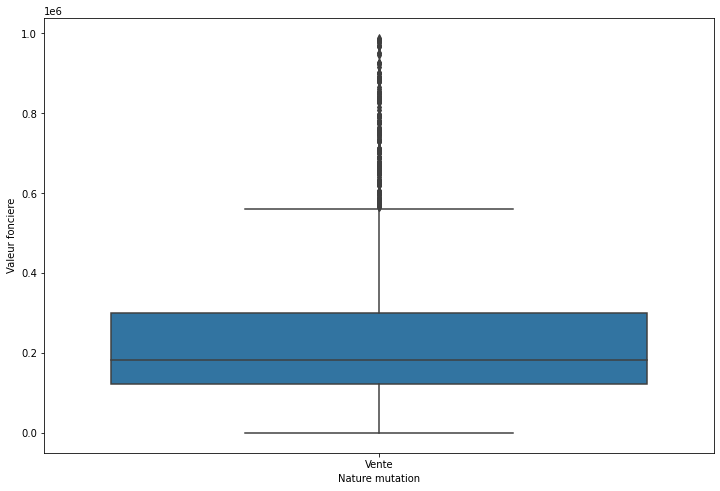

In [50]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Nature mutation", y="Valeur fonciere", data=df)

{'whiskers': [<matplotlib.lines.Line2D at 0x28734381160>,
 'caps': [<matplotlib.lines.Line2D at 0x28734381820>,
 'boxes': [<matplotlib.lines.Line2D at 0x28734374dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x28734381f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2873438d2b0>],
 'means': []}

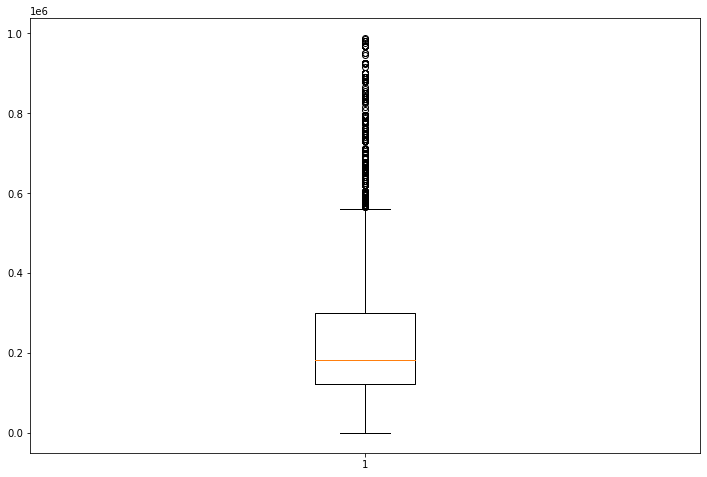

In [51]:
plt.figure(figsize=(12,8))
plt.boxplot(df['Valeur fonciere'])  #plus simple d'utiliser le plt.boxplot ici car on a pas besoin de renseigner un abscisse

<AxesSubplot:>

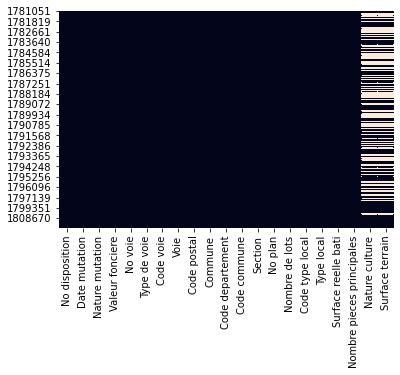

In [52]:
sns.heatmap(df.isna(),cbar=False)

In [53]:
df.shape

(4469, 21)

On a déjà plus que 6515 lignes et 23 colonnes (on avait (14750, 43) au départ !) On va continuer d'explorer nos données il y a beaucoup de valeurs manquantes/nulles pour la variable Surface terrain, c'est un probleme car il semble difficile de predire la valeur d'un bien sans connaitre la surface du terrain (que vaut la valeur de surface terrain pour appartement?)

In [54]:
df['Type local'].value_counts()

Appartement    3221
Maison         1248
Name: Type local, dtype: int64

Ici, on ne souhaite étudier uniquement les maisons/appartements donc on va supprimer local industriel...


In [55]:
df = df[df['Type local']!='Local industriel. commercial ou assimilé'] #on ajoute egalement cette modif dans la fonction preprocessing

<AxesSubplot:xlabel='Type local', ylabel='Valeur fonciere'>

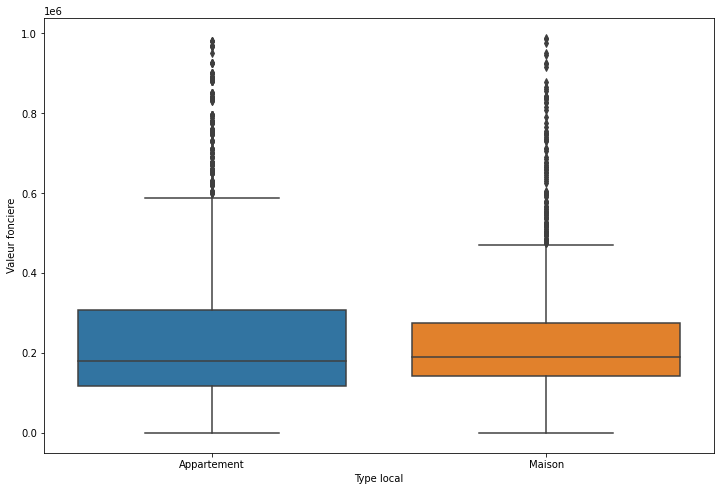

In [56]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Type local", y="Valeur fonciere", data=df)

Présence de maisons/appartement dont la valeur est supérieure à 2 millions, on va les filtrer 

In [57]:
df = df[df['Valeur fonciere']<1000000] #on supprime les biens dont la valeur est supérieure à 2 millions (outliers qui ne nous interesse pas)


<AxesSubplot:xlabel='Type local', ylabel='Valeur fonciere'>

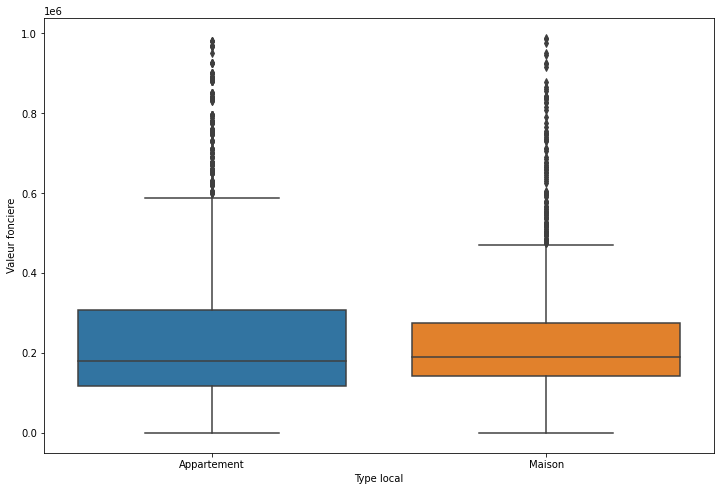

In [58]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Type local", y="Valeur fonciere", data=df)

<AxesSubplot:xlabel='Type local', ylabel='count'>

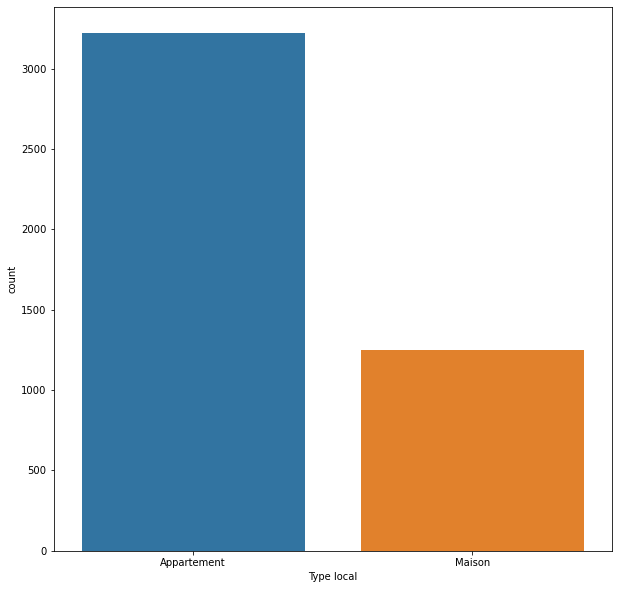

In [59]:
plt.figure(figsize=(10,10))
sns.countplot(x='Type local', data=df)

# Relations target/variables

## Prix/Code postal

In [64]:
df['Code postal'].value_counts()

59800.0    1938
59000.0    1742
59160.0     438
59260.0     331
59777.0      20
Name: Code postal, dtype: int64

<AxesSubplot:xlabel='Code postal', ylabel='Valeur fonciere'>

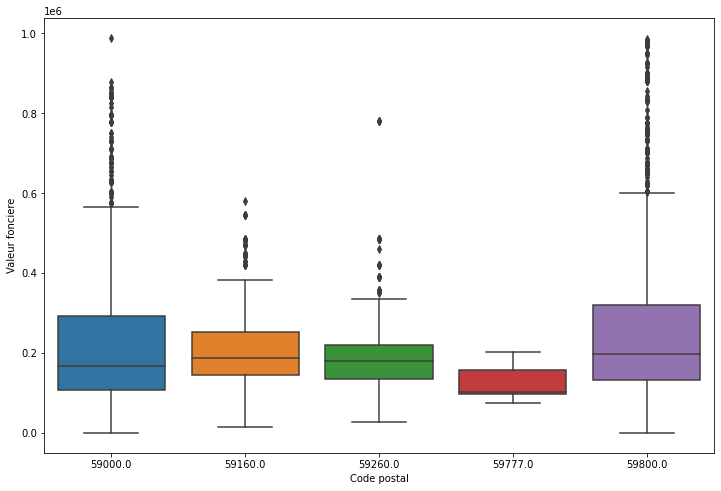

In [65]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Code postal", y="Valeur fonciere", data=df)

On voit que les différentes médianes sont à peu près égales, mais que les prix montent + dans 59000 et 59800
Prix plus bas dans 59777, on va afficher précisement les médianes pour comparer 

In [66]:
df['Valeur fonciere'].median()
(df['Code postal'].value_counts())

59800.0    1938
59000.0    1742
59160.0     438
59260.0     331
59777.0      20
Name: Code postal, dtype: int64

In [67]:
liste_code = [59800, 59000, 59160, 59260, 59777]
for i in liste_code: 
    print(i,' : ')
    print(df['Valeur fonciere'][df['Code postal']==i].median())


59800  : 
197500.0
59000  : 
167725.0
59160  : 
187500.0
59260  : 
179500.0
59777  : 
101500.0


Différence de 30k dans la mediane entre 59000 et 59800, on peut imaginer que le code postal influe sur la valeur d'un bien (localisation)

# Prix/Surface reelle bati

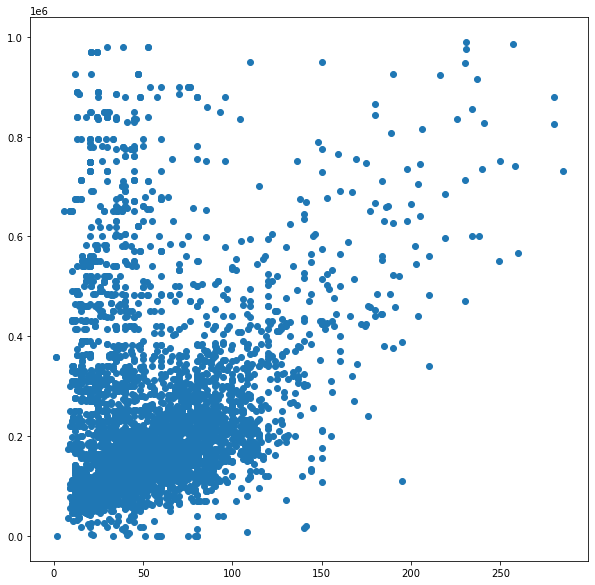

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['Surface reelle bati'],y=df['Valeur fonciere'])

La majeure partie se situe à moins de 150 m² et à moins de 400k
Quelques valeurs étonnantes à environ 350m² pour 200k

In [69]:
df[df['Surface reelle bati']>330]

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain


Même adresse même surface et une différence de prix de 700k, on va supprimer les valeurs où la surface est supérieure à 300m² pour supprimer ces erreurs de saisie

In [70]:
def preprocessing2(df): #on regroupe toutes les modifications qu'on fait sur le dataset dans une fonction preprocessing 
    df = df[df['Surface reelle bati']<320]
    return df
    
df = preprocessing2(df)

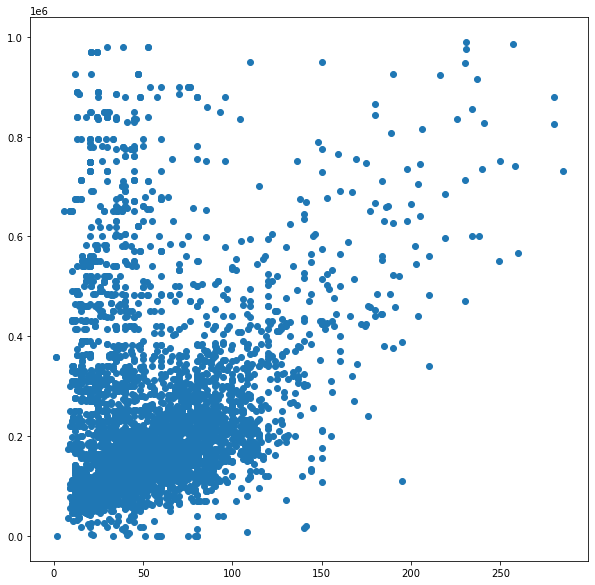

In [71]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['Surface reelle bati'],y=df['Valeur fonciere'])

# Conclusion sur les NaN et valeurs nulles

In [72]:
df.isnull().sum() #on constate bcp de valeurs nulles pour la surface Carrez on va supprimer la colonne

No disposition                  0
Date mutation                   0
Nature mutation                 0
Valeur fonciere                 0
No voie                         1
Type de voie                    0
Code voie                       0
Voie                            0
Code postal                     0
Commune                         0
Code departement                0
Code commune                    0
Section                         0
No plan                         0
Nombre de lots                  0
Code type local                 0
Type local                      0
Surface reelle bati             0
Nombre pieces principales       0
Nature culture               2068
Surface terrain              2068
dtype: int64

In [46]:
df.shape

(39851, 21)

Il y a quasiment la moitié des données pour Surface terrain qui manque, on verra comment gérer ça car cela peut être un pb

In [1]:
sns.boxplot(x="Type de voie", y="Valeur fonciere", data=df) #on voit que le type de voie est important car le prix dans une rue/avenue different par ex
df = df[df['Valeur fonciere']<8000000] #on supprime les biens dont la valeur est supérieure à 8 millions (outliers)

NameError: name 'sns' is not defined